In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import gym
import random
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class Agent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size # 4
        self.action_size = action_size # 2
        self.memory = [] # to save our prev. actions
        self.gamma = 0.95 # discount rate
        self.epsilon = 1.0 # exploration rate
        self.epsilon_lb = 0.05 # lower bound
        self.epsilon_dc = 0.99 # decay
        self.lr = 0.001 # lr for the dnn
        self.model = self.build_model()
       
    # DNN for our Q-Learning Model
    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size))
        model.add(Activation("relu"))
        model.add(Dense(12))
        model.add(Activation("relu"))
        model.add(Dense(self.action_size))
        model.compile(loss="mse", optimizer=Adam(lr=self.lr))
        return model
    
    # We save the prev experiences for later re-train
    def remember(self, state, action, reward, next_state, finished):
        self.memory.append([state, action, reward, next_state, finished])
       
    # Get action by DNN or by Random sampling
    def get_action(self, state):
        # Select random action
        if np.random.rand() <= self.epsilon:
            return np.random.randint(self.action_size)
        # Compute action based on our DNN
        action = self.model.predict(state)
        return np.argmax(action[0])
    
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size) 
        for state, action, reward, next_state, finished in minibatch:
            target = reward
            # Predict the future discounted reward
            if not finished:
                # Q-Learning, pointwise loss function
                target = (reward + self.gamma * np.max(self.model.predict(next_state)[0]))
            # Train the agent to approx the current state to futute rewards
            target_future = self.model.predict(state)
            target_future[0][action] = target
            self.model.fit(state, target_future, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_lb:
            self.epsilon = self.epsilon * self.epsilon_dc

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


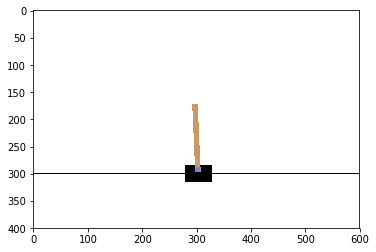

In [3]:
episodes = 1000
env = gym.make("CartPole-v1")
env.reset()
plt.imshow(env.render(mode="rgb_array"))
plt.show()